In [1]:
## Uncomment the below lines if needed.
# !pip install pandas
# !pip install seaborn
# !pip install nltk

In [2]:
import os
import seaborn as sns
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from nltk.tokenize import sent_tokenize, word_tokenize

In [3]:
filenames = []
files_path = "./data/doyle/"
for file in os.listdir(files_path):
    if file.endswith(".txt"):
        filenames.append(os.path.join(files_path, file))

In [4]:
file_contents = []

for filename in filenames :
    with open(filename, 'r', encoding='utf-8-sig') as fo :
        file_text = fo.read()
        file_contents.append(file_text)

In [23]:
file_segment_lengths = []

plotby = "paragraph"

if plotby=="sentence" :
    for file_content in file_contents:
        sentences = sent_tokenize(file_content)
        sentence_words = [word_tokenize(s) for s in sentences]
        sentence_lengths = [len(w) for w in sentence_words]
        file_segment_lengths.append(sentence_lengths)
elif plotby == "paragraph" :
    for file_content in file_contents:
        paragraphs = file_content.split("\n\n")
        paragraph_sent_lengths = []
        for paragraph in paragraphs :
            sentences = sent_tokenize(paragraph)
            sentence_words = [word_tokenize(s) for s in sentences]
            sentence_lengths = [len(w) for w in sentence_words]
            if len(sentence_lengths) > 0 :
                avg_sentence_length = sum(sentence_lengths)/len(sentence_lengths)
                paragraph_sent_lengths.append(avg_sentence_length)
            else :
                continue
        file_segment_lengths.append(paragraph_sent_lengths)


In [28]:
df_list = []
for ind, filename in enumerate(filenames) :
    s = file_segment_lengths[ind]
    indices = [ind for ind in range(len(s))]
    file = filename.split('/')[-1].split('.')[0]
    print(file)
    df = pd.DataFrame({'title' : file, 'paragraph index' : indices, 'avg sentence length' : s})
    df_list.append(df)
books_df = pd.concat(df_list)

a-study-in-scarlet
the-sign-of-the-four
the-hound-of-the-baskervilles
the-lost-world
the-valley-of-fear


In [36]:
def plot_sentences(df, filename, max_norm = 200) :
    books_reordered_df = df.sort_values(by=['avg sentence length'])
    sns.set_style('white')
    sns.set_context('paper')
    # fig = plt.figure(dpi=300)
    g = sns.FacetGrid(books_reordered_df, row="title", height=4, aspect=8)
    g.map_dataframe(plt.vlines, "paragraph index", 0, "avg sentence length", alpha=0.4)
    plt.savefig(filename, bbox_inches='tight')
    

In [37]:
max_sentence_length = max(books_df['avg sentence length'].to_list())
# book_order = ['a-study-in-scarlet', 'the-sign-of-the-four', 'the-hound-of-the-baskervilles', 'the-valley-of-fear', 'the-lost-world']
# book_name = book_order[0]

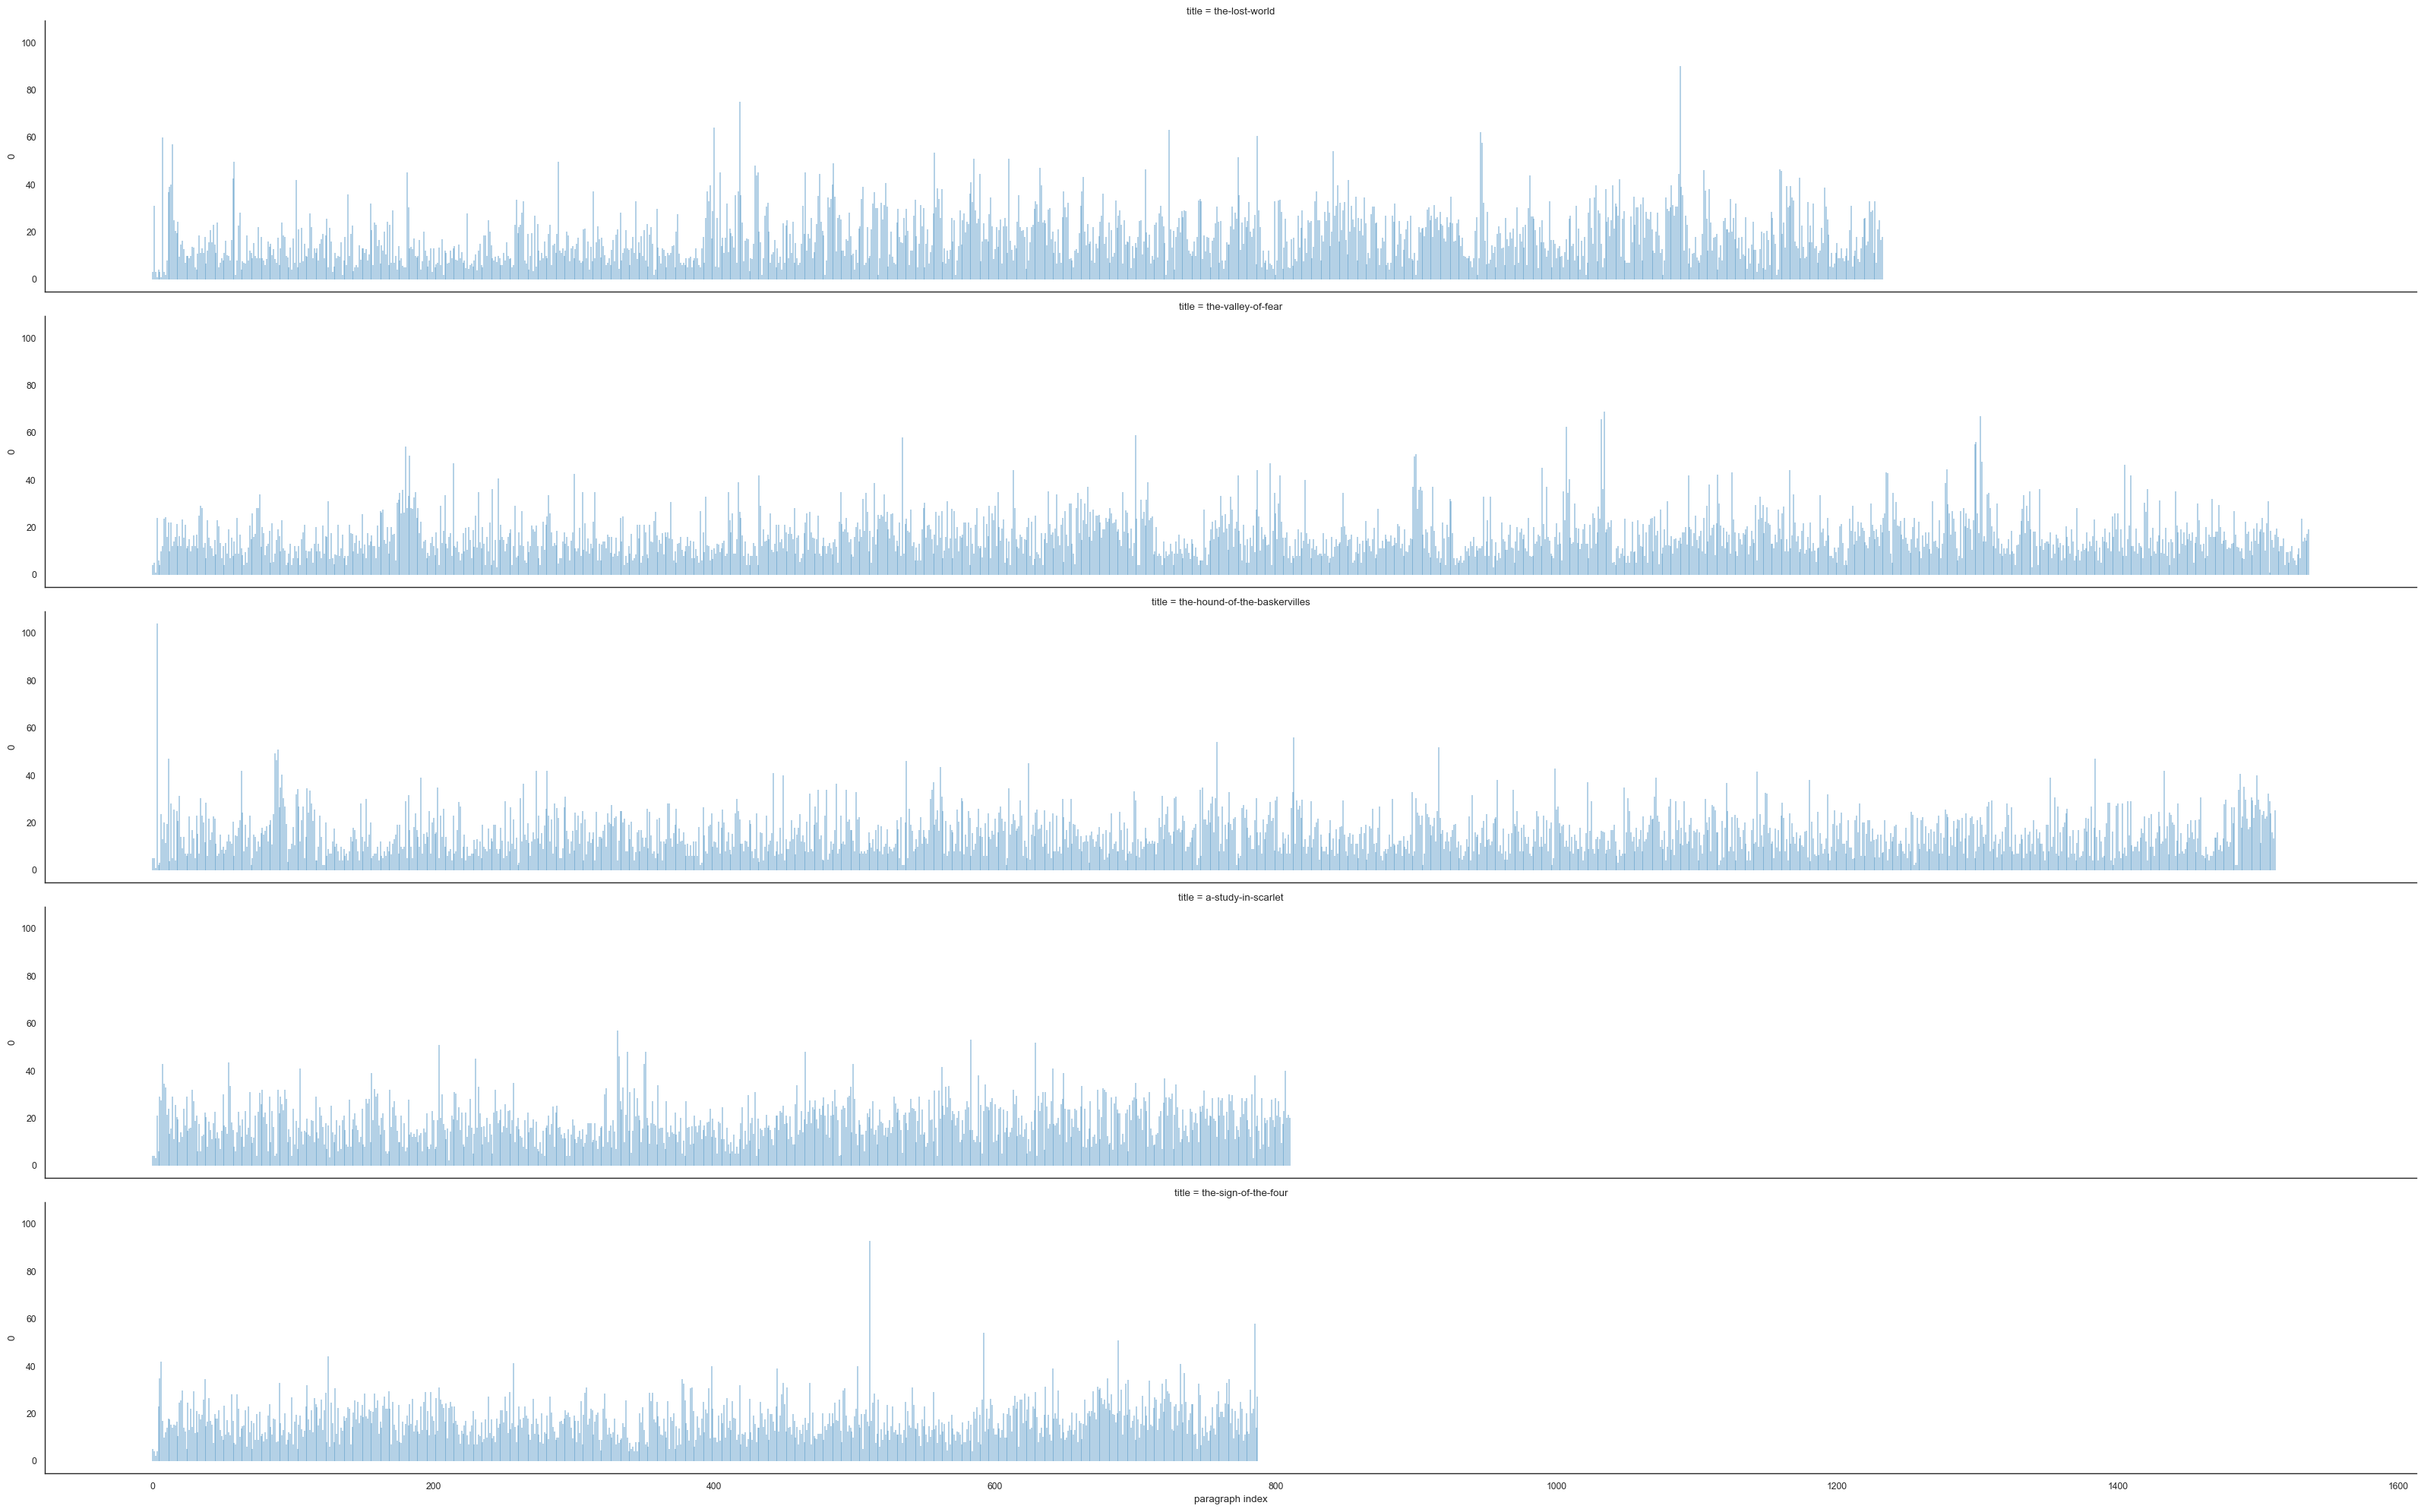

In [38]:
plot_sentences(books_df, './plots/sentence_lengths_doyle.pdf', max_norm = max_sentence_length)

## TO DO:
Compare with the works of a different author.